# pix2pix for Maps to Aerial Image Translation

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import split_dataset
import matplotlib.pyplot as plt
import numpy as np
import pixutils as pxu
from pix2pix import UNet, PatchGAN, fit
import wandb

In [2]:
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
train_path = "pix2pix-maps/train/*.jpg"
val_path = "pix2pix-maps/val/*.jpg"

buffer_size = 256
resize_to = 256
patch_size = 256
num_of_patches = (600//patch_size)**2

config = {
    "batch_size": 1,
    "lr_gen": 0.0002,
    "beta_1_gen": 0.5,
    "lr_disc": 0.0002,
    "beta_1_disc": 0.5,
    "epochs": 200,
    "l1_lambda": 100,
}

## Run the following code block on Kaggle only

In [4]:
train_path = f"/kaggle/input/{train_path}"
val_path = f"/kaggle/input/{val_path}"

## Load dataset

In [5]:
train = tf.data.Dataset.list_files(train_path)
val = tf.data.Dataset.list_files(val_path)

In [6]:
train = train.map(pxu.load_image)
train = train.map(lambda input_image, real_image: pxu.extract_patches(input_image, real_image, patch_size, num_of_patches))
# data are in batches of size 'num_of_patches' after 'extract_patches'
train = train.unbatch()
train = train.map(lambda input_patches, real_patches: pxu.random_jitter(input_patches, real_patches, 286))
train = train.map(pxu.rescale_images)
train = train.shuffle(buffer_size)
train = train.batch(config["batch_size"])

val = val.map(pxu.load_image)
val = val.map(lambda input_image, real_image: pxu.extract_patches(input_image, real_image, patch_size, num_of_patches))
# data are in batches of size 'num_of_patches' after 'extract_patches'
val = val.unbatch()
val = val.map(pxu.rescale_images)
val = val.batch(config["batch_size"])

## Visualize a few images

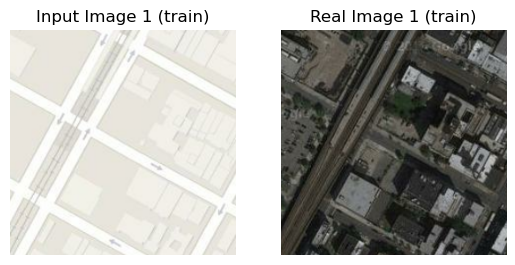

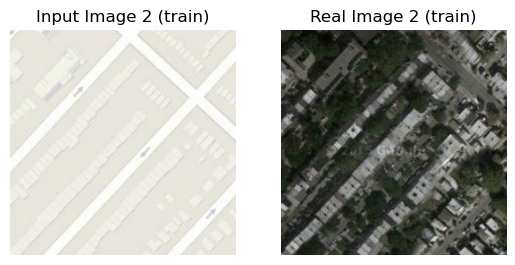

In [7]:
i = 0
for input_batch, real_batch in train.take(2):
    for input_image, real_image in zip(input_batch, real_batch):
        i += 1
        pxu.show(
            input_image,
            real_image,
            i,
            "train"
        )

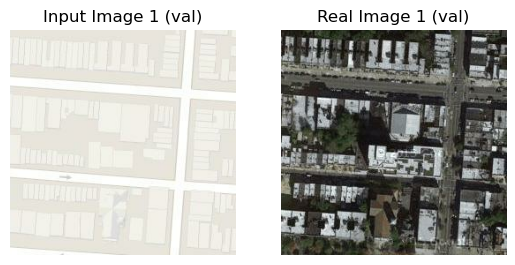

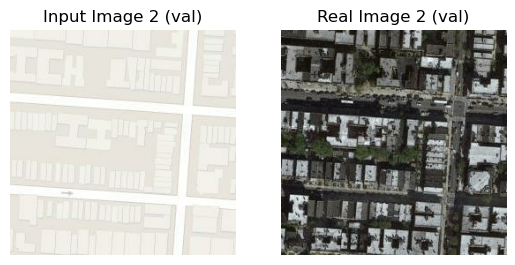

In [8]:
i = 0
for input_batch, real_batch in val.take(2):
    for input_image, real_image in zip(input_batch, real_batch):
        i += 1
        pxu.show(
            input_image,
            real_image,
            i,
            "val"
        )

## Create models

In [9]:
G = UNet(input_shape=(resize_to, resize_to, 3))
D = PatchGAN(input_shape=(resize_to, resize_to, 3))

g_optim = Adam(learning_rate=config["lr_gen"], beta_1=config["beta_1_gen"])
d_optim = Adam(learning_rate=config["lr_disc"], beta_1=config["beta_1_disc"])

## Train

wandb: Currently logged in as: v-modroczky (nsiete23). Use `wandb login --relogin` to force relogin


2023-04-27 22:19:29.095010: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_8/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch: 1, Step: 4383, Gen Loss: 23.0245361328125, Disc Loss: 2.72145819664001463355


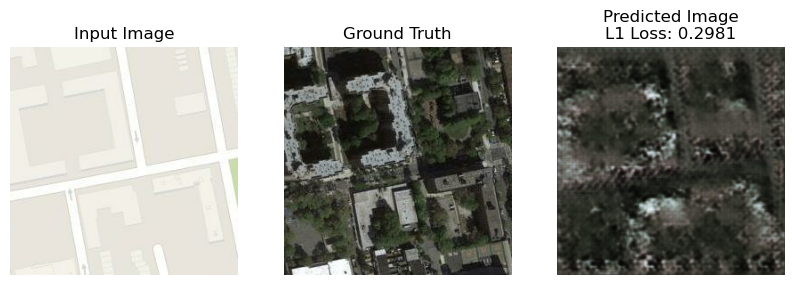

Epoch: 2, Step: 4383, Gen Loss: 31.877222061157227, Disc Loss: 0.159248322248458864
Epoch: 3, Step: 4383, Gen Loss: 11.005791664123535, Disc Loss: 0.346454292535781865
Epoch: 4, Step: 4383, Gen Loss: 25.826515197753906, Disc Loss: 0.124155819416046145
Epoch: 5, Step: 4383, Gen Loss: 33.623531341552734, Disc Loss: 0.7427361607551575146
Epoch: 6, Step: 4383, Gen Loss: 3.0049121379852295, Disc Loss: 1.895756483078003076
Epoch: 7, Step: 4383, Gen Loss: 29.89995002746582, Disc Loss: 0.0506764501333236725
Epoch: 8, Step: 4383, Gen Loss: 34.543357849121094, Disc Loss: 0.194214239716529854
Epoch: 9, Step: 4383, Gen Loss: 18.86226463317871, Disc Loss: 0.54564839601516724463
Epoch: 10, Step: 4383, Gen Loss: 25.63026237487793, Disc Loss: 2.73234748840332032974


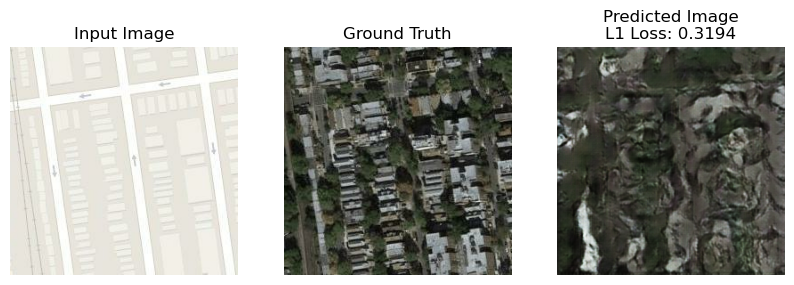

Epoch: 11, Step: 4383, Gen Loss: 22.190929412841797, Disc Loss: 0.0188849028199911125
Epoch: 12, Step: 4383, Gen Loss: 19.23431396484375, Disc Loss: 0.90797293186187747334
Epoch: 13, Step: 4383, Gen Loss: 17.992645263671875, Disc Loss: 2.0741975307464617445
Epoch: 14, Step: 4383, Gen Loss: 13.41511344909668, Disc Loss: 0.87466847896575933945
Epoch: 15, Step: 4383, Gen Loss: 40.946624755859375, Disc Loss: 0.0505031533539295265
Epoch: 16, Step: 4383, Gen Loss: 18.59029197692871, Disc Loss: 1.71299231052398683224
Epoch: 17, Step: 4383, Gen Loss: 23.877756118774414, Disc Loss: 2.0766181945800787745
Epoch: 18, Step: 4383, Gen Loss: 31.419292449951172, Disc Loss: 0.0089783472940325745
Epoch: 19, Step: 4383, Gen Loss: 28.546016693115234, Disc Loss: 0.168785125017166147
Epoch: 20, Step: 4383, Gen Loss: 26.240026473999023, Disc Loss: 0.108278572559356692


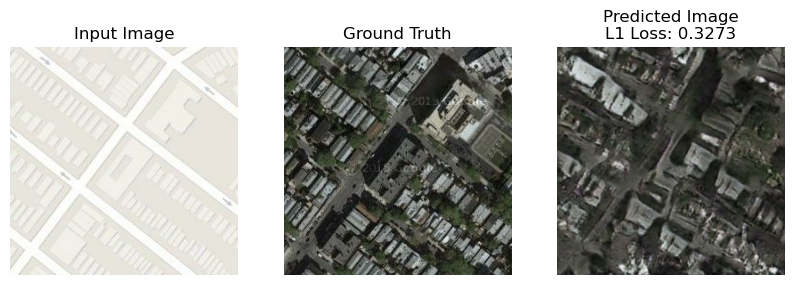

Epoch: 21, Step: 4383, Gen Loss: 6.197148323059082, Disc Loss: 1.4987893104553223753
Epoch: 22, Step: 4383, Gen Loss: 18.316125869750977, Disc Loss: 0.9931447505950928757
Epoch: 23, Step: 4383, Gen Loss: 21.909183502197266, Disc Loss: 2.4267101287841797062
Epoch: 24, Step: 4383, Gen Loss: 16.595672607421875, Disc Loss: 0.1926231831312179635
Epoch: 25, Step: 4383, Gen Loss: 35.02305603027344, Disc Loss: 0.4844267368316650456
Epoch: 26, Step: 4383, Gen Loss: 20.117454528808594, Disc Loss: 0.566627025604248445
Epoch: 27, Step: 4383, Gen Loss: 27.35736846923828, Disc Loss: 0.41794058680534363748
Epoch: 28, Step: 4383, Gen Loss: 2.7109713554382324, Disc Loss: 1.1814383268356323646
Epoch: 29, Step: 4383, Gen Loss: 30.186817169189453, Disc Loss: 1.031218647956848145
Epoch: 30, Step: 4383, Gen Loss: 36.758094787597656, Disc Loss: 0.1386879682540893657


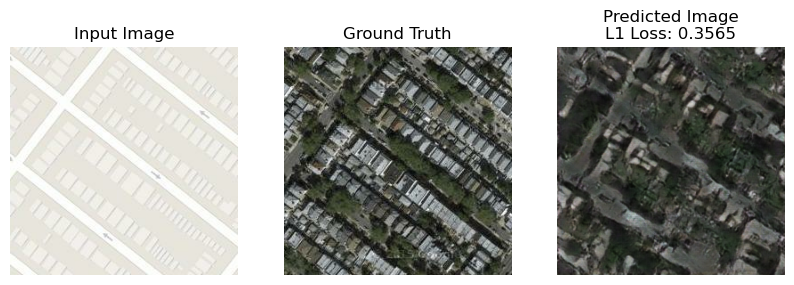

Epoch: 31, Step: 4383, Gen Loss: 26.713878631591797, Disc Loss: 0.049883399158716236
Epoch: 32, Step: 4383, Gen Loss: 27.322900772094727, Disc Loss: 4.338715553283691244
Epoch: 33, Step: 4383, Gen Loss: 32.56528854370117, Disc Loss: 0.28920716047286993446
Epoch: 34, Step: 4383, Gen Loss: 25.472721099853516, Disc Loss: 0.086434066295623785
Epoch: 35, Step: 4383, Gen Loss: 31.3690242767334, Disc Loss: 0.29196131229400635774
Epoch: 36, Step: 4383, Gen Loss: 38.67386245727539, Disc Loss: 0.1069873049855232245
Epoch: 37, Step: 4383, Gen Loss: 11.555208206176758, Disc Loss: 0.929939925670623845
Epoch: 38, Step: 4383, Gen Loss: 38.90347671508789, Disc Loss: 0.05495624616742134775
Epoch: 39, Step: 4383, Gen Loss: 25.56802749633789, Disc Loss: 0.29342925548553467865
Epoch: 40, Step: 4383, Gen Loss: 10.261117935180664, Disc Loss: 1.1396057605743408355


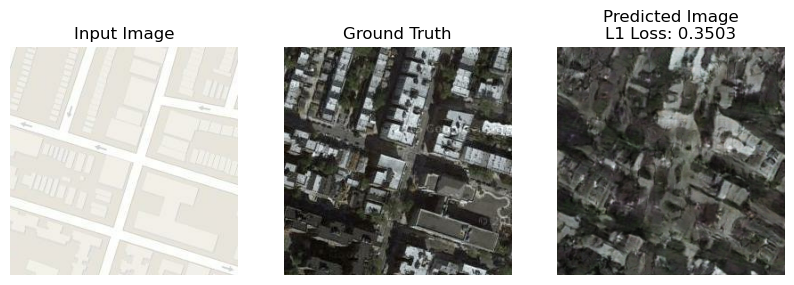

Epoch: 41, Step: 4383, Gen Loss: 30.996408462524414, Disc Loss: 0.032331667840480804
Epoch: 42, Step: 4383, Gen Loss: 11.368247985839844, Disc Loss: 0.2569799423217773455
Epoch: 43, Step: 4383, Gen Loss: 31.883441925048828, Disc Loss: 0.347743391990661676
Epoch: 44, Step: 4383, Gen Loss: 21.79183578491211, Disc Loss: 0.41948634386062629566
Epoch: 45, Step: 4383, Gen Loss: 34.85702896118164, Disc Loss: 0.3009045720100403963
Epoch: 46, Step: 4383, Gen Loss: 29.912498474121094, Disc Loss: 0.3965373337268829384
Epoch: 47, Step: 4383, Gen Loss: 29.08770751953125, Disc Loss: 1.18875348567962653565
Epoch: 48, Step: 4383, Gen Loss: 6.585165023803711, Disc Loss: 1.3874225616455078766
Epoch: 49, Step: 4383, Gen Loss: 26.852176666259766, Disc Loss: 0.430619835853576664
Epoch: 50, Step: 4383, Gen Loss: 39.341583251953125, Disc Loss: 0.048215389251708984


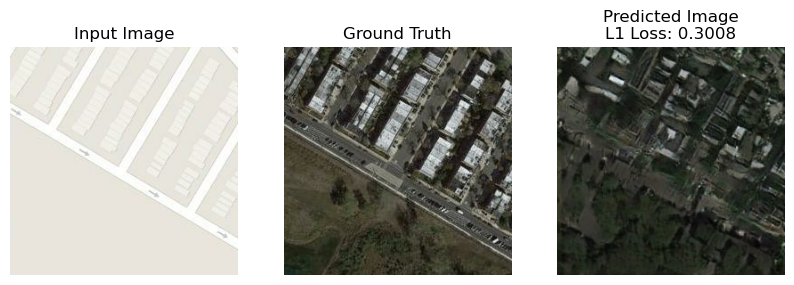

Epoch: 51, Step: 4383, Gen Loss: 40.15542221069336, Disc Loss: 0.0648874491453170875
Epoch: 52, Step: 4383, Gen Loss: 32.989952087402344, Disc Loss: 0.066792055964469913
Epoch: 53, Step: 4383, Gen Loss: 26.101215362548828, Disc Loss: 0.712473332881927583
Epoch: 54, Step: 4383, Gen Loss: 35.45332336425781, Disc Loss: 0.56984478235244757654
Epoch: 55, Step: 4383, Gen Loss: 22.824913024902344, Disc Loss: 0.3353716135025024455
Epoch: 56, Step: 4383, Gen Loss: 36.743682861328125, Disc Loss: 0.052857570350170135
Epoch: 57, Step: 4383, Gen Loss: 6.336435317993164, Disc Loss: 0.77784937620162962575
Epoch: 58, Step: 4383, Gen Loss: 17.617839813232422, Disc Loss: 0.4280010759830475155
Epoch: 59, Step: 4383, Gen Loss: 17.840782165527344, Disc Loss: 1.494824647903442486
Epoch: 60, Step: 4383, Gen Loss: 9.405594825744629, Disc Loss: 1.2284386157989502634


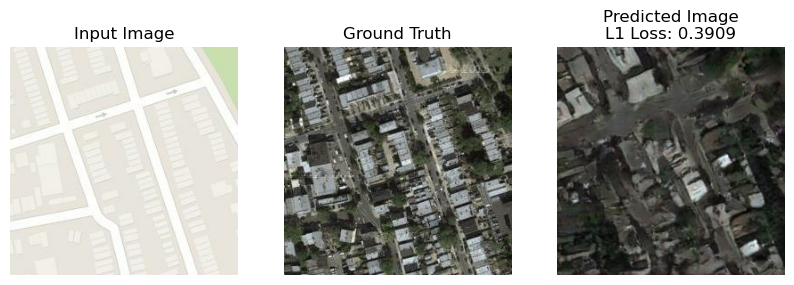

Epoch: 61, Step: 4383, Gen Loss: 26.051395416259766, Disc Loss: 1.322578907012939575
Epoch: 62, Step: 4383, Gen Loss: 3.17876935005188, Disc Loss: 1.430108904838562528454
Epoch: 63, Step: 4383, Gen Loss: 32.67010498046875, Disc Loss: 0.83703136444091844764
Epoch: 64, Step: 4383, Gen Loss: 27.469717025756836, Disc Loss: 0.066400080919265756
Epoch: 65, Step: 4383, Gen Loss: 12.014023780822754, Disc Loss: 0.155408173799514777
Epoch: 66, Step: 4383, Gen Loss: 33.14804458618164, Disc Loss: 0.3061729371547699162
Epoch: 67, Step: 4383, Gen Loss: 30.833984375, Disc Loss: 0.9295841455459595321048155
Epoch: 68, Step: 4383, Gen Loss: 30.114622116088867, Disc Loss: 0.490988790988922166
Epoch: 69, Step: 4383, Gen Loss: 25.153091430664062, Disc Loss: 0.1032477170228958155
Epoch: 70, Step: 4383, Gen Loss: 26.531938552856445, Disc Loss: 0.651796460151672444


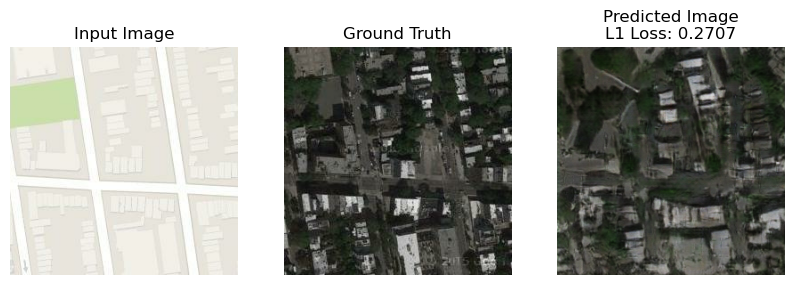

Epoch: 71, Step: 4383, Gen Loss: 26.132347106933594, Disc Loss: 0.4704547822475433365
Epoch: 72, Step: 4383, Gen Loss: 35.124820709228516, Disc Loss: 0.0950502827763557446
Epoch: 73, Step: 4383, Gen Loss: 32.694087982177734, Disc Loss: 0.045559685677289964
Epoch: 74, Step: 4383, Gen Loss: 9.069252967834473, Disc Loss: 1.2892749309539795986
Epoch: 75, Step: 4383, Gen Loss: 21.72119140625, Disc Loss: 0.9851103425025940204474
Epoch: 76, Step: 4383, Gen Loss: 6.135798454284668, Disc Loss: 1.04589271545410166493
Epoch: 77, Step: 4383, Gen Loss: 20.247987747192383, Disc Loss: 0.3316705822944641363
Epoch: 78, Step: 4383, Gen Loss: 26.4200439453125, Disc Loss: 1.23233318328857424446
Epoch: 79, Step: 4383, Gen Loss: 26.791913986206055, Disc Loss: 0.6842929124832153144
Epoch: 80, Step: 4383, Gen Loss: 28.327211380004883, Disc Loss: 0.5701675415039062254


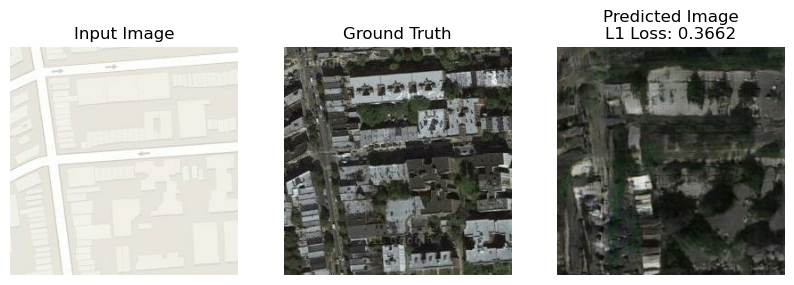

Epoch: 81, Step: 4383, Gen Loss: 17.411823272705078, Disc Loss: 1.0978671312332153446
Epoch: 82, Step: 4383, Gen Loss: 27.882749557495117, Disc Loss: 0.251341581344604525
Epoch: 83, Step: 4383, Gen Loss: 27.74013328552246, Disc Loss: 0.7960177659988403734
Epoch: 84, Step: 4383, Gen Loss: 20.683347702026367, Disc Loss: 1.096143603324890135
Epoch: 85, Step: 4383, Gen Loss: 32.16913986206055, Disc Loss: 0.17341797053813934583
Epoch: 86, Step: 4383, Gen Loss: 5.791894912719727, Disc Loss: 1.6661576032638556276
Epoch: 87, Step: 4383, Gen Loss: 23.28673553466797, Disc Loss: 0.3978657126426697666
Epoch: 88, Step: 4383, Gen Loss: 30.747949600219727, Disc Loss: 0.378890514373779368
Epoch: 89, Step: 4383, Gen Loss: 12.711309432983398, Disc Loss: 0.591525197029113825
Epoch: 90, Step: 4383, Gen Loss: 32.83842468261719, Disc Loss: 0.1367446184158325258


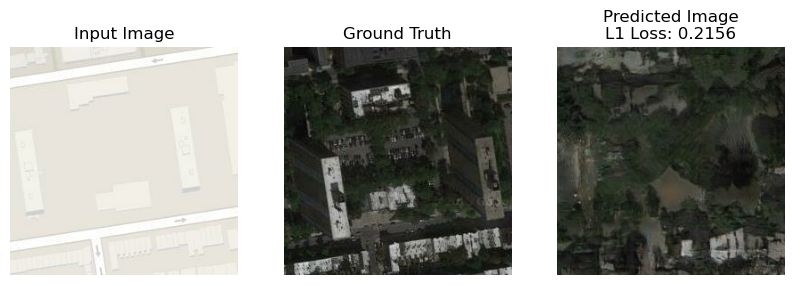

Epoch: 91, Step: 4383, Gen Loss: 15.912402153015137, Disc Loss: 0.1488737910985946774
Epoch: 92, Step: 4383, Gen Loss: 26.284027099609375, Disc Loss: 0.212720751762390145
Epoch: 93, Step: 4383, Gen Loss: 25.416778564453125, Disc Loss: 0.1091865152120590258
Epoch: 94, Step: 4383, Gen Loss: 14.293252944946289, Disc Loss: 0.4973589777946472147
Epoch: 95, Step: 4383, Gen Loss: 29.7553653717041, Disc Loss: 0.241286218166351328775
Epoch: 96, Step: 4383, Gen Loss: 18.833744049072266, Disc Loss: 0.122339054942131044
Epoch: 97, Step: 4383, Gen Loss: 18.968746185302734, Disc Loss: 1.303331613540649485
Epoch: 98, Step: 4383, Gen Loss: 27.748550415039062, Disc Loss: 0.140418499708175666
Epoch: 99, Step: 4383, Gen Loss: 25.493064880371094, Disc Loss: 0.0634873062372207655
Epoch: 100, Step: 4383, Gen Loss: 23.37567138671875, Disc Loss: 0.37775507569313054245


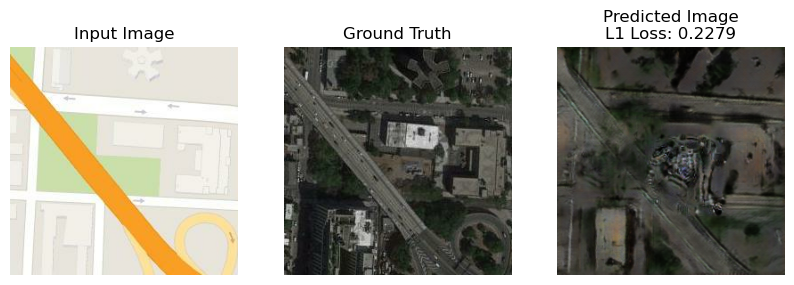

Epoch: 101, Step: 4383, Gen Loss: 29.777524948120117, Disc Loss: 0.1184093430638313355
Epoch: 102, Step: 4383, Gen Loss: 11.631181716918945, Disc Loss: 0.926010608673095764
Epoch: 103, Step: 4383, Gen Loss: 35.14672088623047, Disc Loss: 0.04499278217554092464
Epoch: 104, Step: 4383, Gen Loss: 6.910985469818115, Disc Loss: 2.24408578872680661465
Epoch: 105, Step: 4383, Gen Loss: 37.21504211425781, Disc Loss: 0.38412579894065857866
Epoch: 106, Step: 4383, Gen Loss: 31.570228576660156, Disc Loss: 1.8376543521881104148
Epoch: 107, Step: 4383, Gen Loss: 30.485794067382812, Disc Loss: 0.3278852403163912838
Epoch: 108, Step: 4383, Gen Loss: 27.98927879333496, Disc Loss: 0.29706129431724557938
Epoch: 109, Step: 4383, Gen Loss: 15.086272239685059, Disc Loss: 0.5198608636856079155
Epoch: 110, Step: 4383, Gen Loss: 25.447620391845703, Disc Loss: 1.2417320013046265253


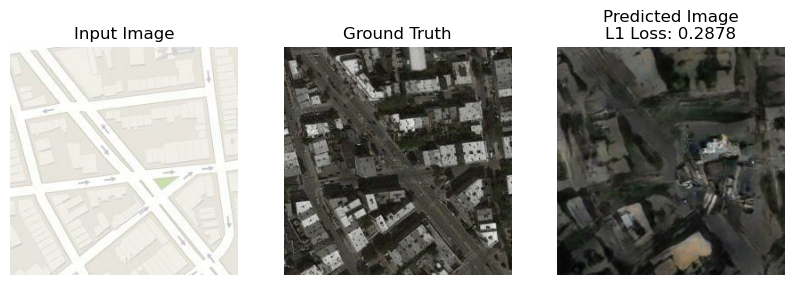

Epoch: 111, Step: 4383, Gen Loss: 33.315711975097656, Disc Loss: 0.0875736325979232867
Epoch: 112, Step: 4383, Gen Loss: 4.1111907958984375, Disc Loss: 0.7531301975250244445
Epoch: 113, Step: 4383, Gen Loss: 40.85968017578125, Disc Loss: 0.2156649231910705688
Epoch: 114, Step: 4383, Gen Loss: 24.869895935058594, Disc Loss: 0.1464185267686844757
Epoch: 115, Step: 4383, Gen Loss: 26.586055755615234, Disc Loss: 0.2383627891540527346
Epoch: 116, Step: 4383, Gen Loss: 27.95762825012207, Disc Loss: 0.0661498084664344861
Epoch: 117, Step: 4383, Gen Loss: 37.807655334472656, Disc Loss: 0.1323799043893814745
Epoch: 118, Step: 4383, Gen Loss: 29.28688621520996, Disc Loss: 0.1085269674658775363
Epoch: 119, Step: 4383, Gen Loss: 10.094040870666504, Disc Loss: 1.0468347072601318546
Epoch: 120, Step: 4383, Gen Loss: 29.897008895874023, Disc Loss: 0.8342720866203308757


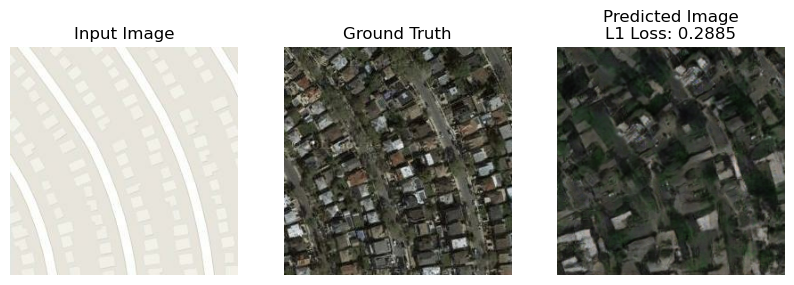

Epoch: 121, Step: 4383, Gen Loss: 6.989450454711914, Disc Loss: 0.21758201718330383715
Epoch: 122, Step: 4383, Gen Loss: 4.541545867919922, Disc Loss: 0.23365780711174013256
Epoch: 123, Step: 4383, Gen Loss: 27.06747055053711, Disc Loss: 0.45345503091812134443
Epoch: 124, Step: 4383, Gen Loss: 21.042449951171875, Disc Loss: 0.777083873748779354
Epoch: 125, Step: 4383, Gen Loss: 32.346702575683594, Disc Loss: 0.481965869665145956
Epoch: 126, Step: 4383, Gen Loss: 17.305208206176758, Disc Loss: 0.497304141521453865
Epoch: 127, Step: 4383, Gen Loss: 34.10856628417969, Disc Loss: 0.1796043962240219474
Epoch: 128, Step: 4383, Gen Loss: 35.608558654785156, Disc Loss: 0.303324371576309222
Epoch: 129, Step: 4383, Gen Loss: 22.46996307373047, Disc Loss: 0.27362051606178284747
Epoch: 130, Step: 4383, Gen Loss: 16.442182540893555, Disc Loss: 0.6841237545013428148


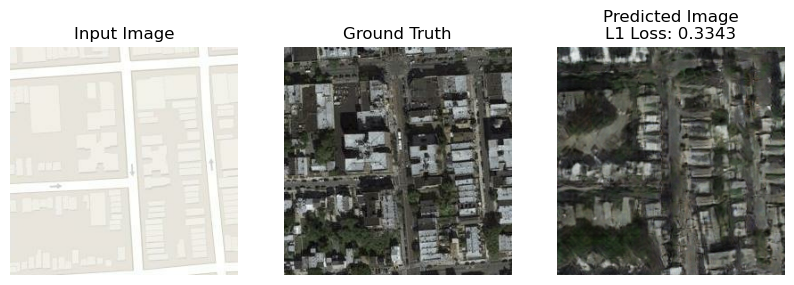

Epoch: 131, Step: 4383, Gen Loss: 19.276704788208008, Disc Loss: 0.6451827287673956234
Epoch: 132, Step: 4383, Gen Loss: 36.21329879760742, Disc Loss: 0.11047665774822235653
Epoch: 133, Step: 4383, Gen Loss: 24.936904907226562, Disc Loss: 0.3773913383483886762
Epoch: 134, Step: 4383, Gen Loss: 37.9765625, Disc Loss: 0.22383938729763036922435764
Epoch: 135, Step: 4383, Gen Loss: 29.22227668762207, Disc Loss: 0.34810039401054381586
Epoch: 136, Step: 4383, Gen Loss: 15.500006675720215, Disc Loss: 0.3483689129352569647
Epoch: 137, Step: 4383, Gen Loss: 31.881912231445312, Disc Loss: 0.126765787601470956
Epoch: 138, Step: 4383, Gen Loss: 23.35517120361328, Disc Loss: 1.7514559030532837545
Epoch: 139, Step: 4383, Gen Loss: 38.29095458984375, Disc Loss: 0.09163075685501099214
Epoch: 140, Step: 4383, Gen Loss: 19.910606384277344, Disc Loss: 0.3422436714172363345


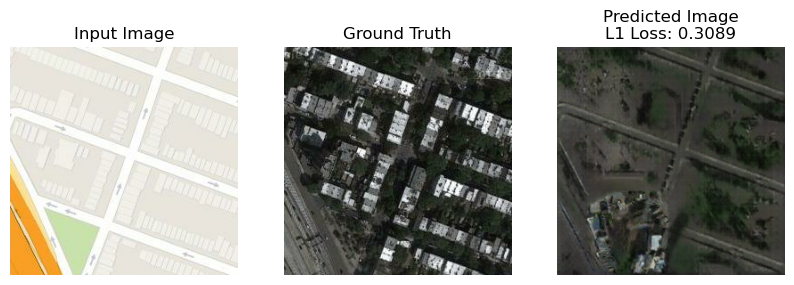

Epoch: 141, Step: 4383, Gen Loss: 17.100658416748047, Disc Loss: 0.0517145693302154548
Epoch: 142, Step: 4383, Gen Loss: 22.48216438293457, Disc Loss: 0.1144535094499588654
Epoch: 143, Step: 4383, Gen Loss: 9.274208068847656, Disc Loss: 0.41600555181503296924
Epoch: 144, Step: 4383, Gen Loss: 25.553403854370117, Disc Loss: 0.2600665390491485665
Epoch: 145, Step: 4383, Gen Loss: 26.113677978515625, Disc Loss: 0.2500478029251098663
Epoch: 146, Step: 4383, Gen Loss: 23.942991256713867, Disc Loss: 0.5612656474113464666
Epoch: 147, Step: 4383, Gen Loss: 15.163832664489746, Disc Loss: 0.301852911710739145
Epoch: 148, Step: 4383, Gen Loss: 16.796672821044922, Disc Loss: 0.2181473970413208445
Epoch: 149, Step: 4383, Gen Loss: 36.78608703613281, Disc Loss: 0.15849065780639648156
Epoch: 150, Step: 4383, Gen Loss: 25.747005462646484, Disc Loss: 2.1830189228057864568


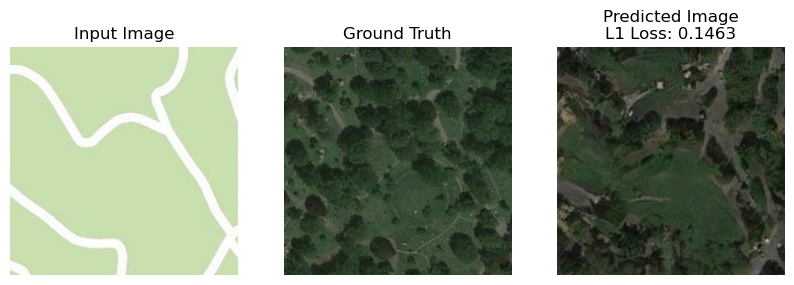

Epoch: 151, Step: 4383, Gen Loss: 21.740739822387695, Disc Loss: 0.686171889305114766
Epoch: 152, Step: 4383, Gen Loss: 17.49066734313965, Disc Loss: 0.39127093553543099926
Epoch: 153, Step: 4383, Gen Loss: 15.066814422607422, Disc Loss: 1.0013581514358522452
Epoch: 154, Step: 4383, Gen Loss: 38.494911193847656, Disc Loss: 0.1779859215021133455
Epoch: 155, Step: 4383, Gen Loss: 33.72957229614258, Disc Loss: 0.04815519228577614566
Epoch: 156, Step: 4383, Gen Loss: 33.89690399169922, Disc Loss: 0.17723876237869263944
Epoch: 157, Step: 4383, Gen Loss: 21.903568267822266, Disc Loss: 0.2894792258739471444
Epoch: 158, Step: 4383, Gen Loss: 24.04753303527832, Disc Loss: 0.4828617274761286372
Epoch: 159, Step: 4383, Gen Loss: 31.46668243408203, Disc Loss: 0.0922057852149009746
Epoch: 160, Step: 4383, Gen Loss: 37.69954299926758, Disc Loss: 0.36097928881645268325


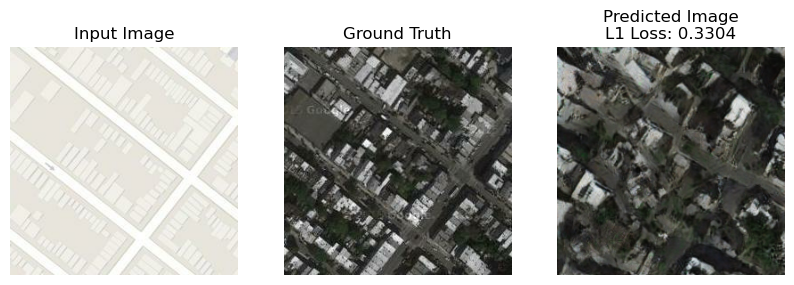

Epoch: 161, Step: 4383, Gen Loss: 31.618288040161133, Disc Loss: 0.5476678013801575255
Epoch: 162, Step: 4383, Gen Loss: 18.958599090576172, Disc Loss: 0.4754163622856149646
Epoch: 163, Step: 4383, Gen Loss: 15.016777992248535, Disc Loss: 0.2209501862525947525
Epoch: 164, Step: 4383, Gen Loss: 32.028236389160156, Disc Loss: 0.0913906693458557155
Epoch: 165, Step: 4383, Gen Loss: 31.734573364257812, Disc Loss: 1.4183654785156257677
Epoch: 166, Step: 4383, Gen Loss: 22.63451385498047, Disc Loss: 0.0951945483684539826
Epoch: 167, Step: 4383, Gen Loss: 27.15878677368164, Disc Loss: 0.06405716389417648165
Epoch: 168, Step: 4383, Gen Loss: 20.188453674316406, Disc Loss: 1.4924150705337524555
Epoch: 169, Step: 4383, Gen Loss: 18.528392791748047, Disc Loss: 0.069338940083980567
Epoch: 170, Step: 4383, Gen Loss: 26.86358642578125, Disc Loss: 0.1998449563980102564


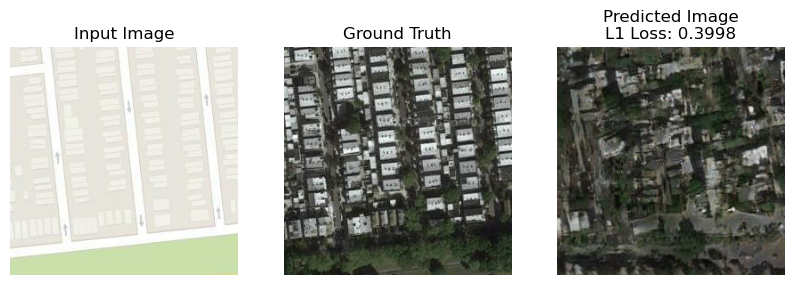

Epoch: 171, Step: 4383, Gen Loss: 26.314472198486328, Disc Loss: 0.7243759632110596666


In [ ]:
wandb.init(config=config, project='pix2pix')

fit(
    train_data=train,
    val_data=val,
    epochs=config["epochs"],
    generator=G,
    discriminator=D,
    generator_optimizer=g_optim,
    discriminator_optimizer=d_optim,
    l1_lambda=config["l1_lambda"],
)

In [ ]:
wandb.finish()